## Importing Libraries

In [ ]:
!pip install plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import os
from IPython.display import display, clear_output

## Loading initial data

In [ ]:
events = pd.read_csv("1202Events.csv") 
sensor = pd.read_csv("post_lunch_test.csv")

In [ ]:
events["time_ms"] = np.nan
sensor["time_ms"] = np.nan
events["time_s"] = np.nan
sensor["time_s"] = np.nan

In [ ]:
events.columns = ['ts','value', 'time_ms', 'time_s']
sensor.columns = ['ts','value', 'time_ms', 'time_s']

In [ ]:
events=events.iloc[947:len(events)]#new events, starts from 947th index

In [ ]:
old_events=events.iloc[0:947]#old events

## Useful functions
Data Cleaning:

In [ ]:
def fixTime(df):
    for x in range(0,len(df)):
        #update progress
        clear_output(wait=True)
        print('Iteration '+str(x)+'/'+str(len(df)))
    
        #reformat time
        ts=df['ts'].iloc[x]
        df['time_ms'].iloc[x]=datetime.utcfromtimestamp(ts).strftime('%H:%M:%S.%f')
        df['time_s'].iloc[x]=datetime.utcfromtimestamp(ts).strftime('%H:%M:%S')
        #df['ts'].iloc[x]=int(df['ts'].iloc[x])
    return df

In [ ]:
def saveCsv(df, name):
    df.to_csv(str(name),index=False)

Visualisation:

In [ ]:
def save_pdf(fig,name):
    if not os.path.exists("images"):
        os.mkdir("images")
        
    fig.write_image("images/fig_"+str(name)+".pdf")


## Cleaning the data

In [ ]:
events=fixTime(events)

In [ ]:
sensor=fixTime(sensor)

In [ ]:
events.tail()

Save cleaned data for further reuse

In [ ]:
saveCsv(sensor,'sensor_cleaned.csv')

In [ ]:
saveCsv(events,'events_cleaned.csv')

# Load cleaned data

In [3]:
events = pd.read_csv("events_cleaned.csv") 
sensor = pd.read_csv("sensor_cleaned.csv")

## Plotting data

In [ ]:
fig = px.scatter(x=sensor['time_ms'], y=sensor['value'])
fig.show()


In [ ]:
fig2 = px.scatter(x=events['time_s'], y=events['value'])
fig2.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sensor['time_ms'], y=sensor['value'], name="Sensor",
                         line_color='deepskyblue', mode='markers'))

fig.add_trace(go.Scatter(x=events['time_ms'], y=events['value'], name="Events",
                         line_color='red', mode='markers'))


fig.show()

In [ ]:
#Merge the two datasets on time
e=events[['time_s', 'value']]
s=sensor[['time_s', 'value']]
merged = pd.merge(s, e, on='time_s')
merged.columns = ['time','sensor', 'event']

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged.time, y=merged.sensor, name="Sensor",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=merged.time, y=merged.event, name="Events",
                         line_color='red', mode='markers'))

fig.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=False)

fig.show()

In [ ]:
date=merged.time
fig, ax = plt.subplots(figsize=(30, 15))

plt.plot(date, merged.sensor,color='b', marker='o', alpha=0.1)
plt.plot(date, merged.event,color='r',linewidth=2)

plt.xticks(rotation='vertical')
# We change the fontsize of minor ticks label 
ax.tick_params(axis="x", which='major', labelsize=8)
ax.tick_params(axis="y", which='major', labelsize=16)


plt.show()

#fig.savefig("test_pdf.pdf", bbox_inches='tight')


In [5]:
x=sensor['ts']#[::10]
y=sensor['value']#[::10]

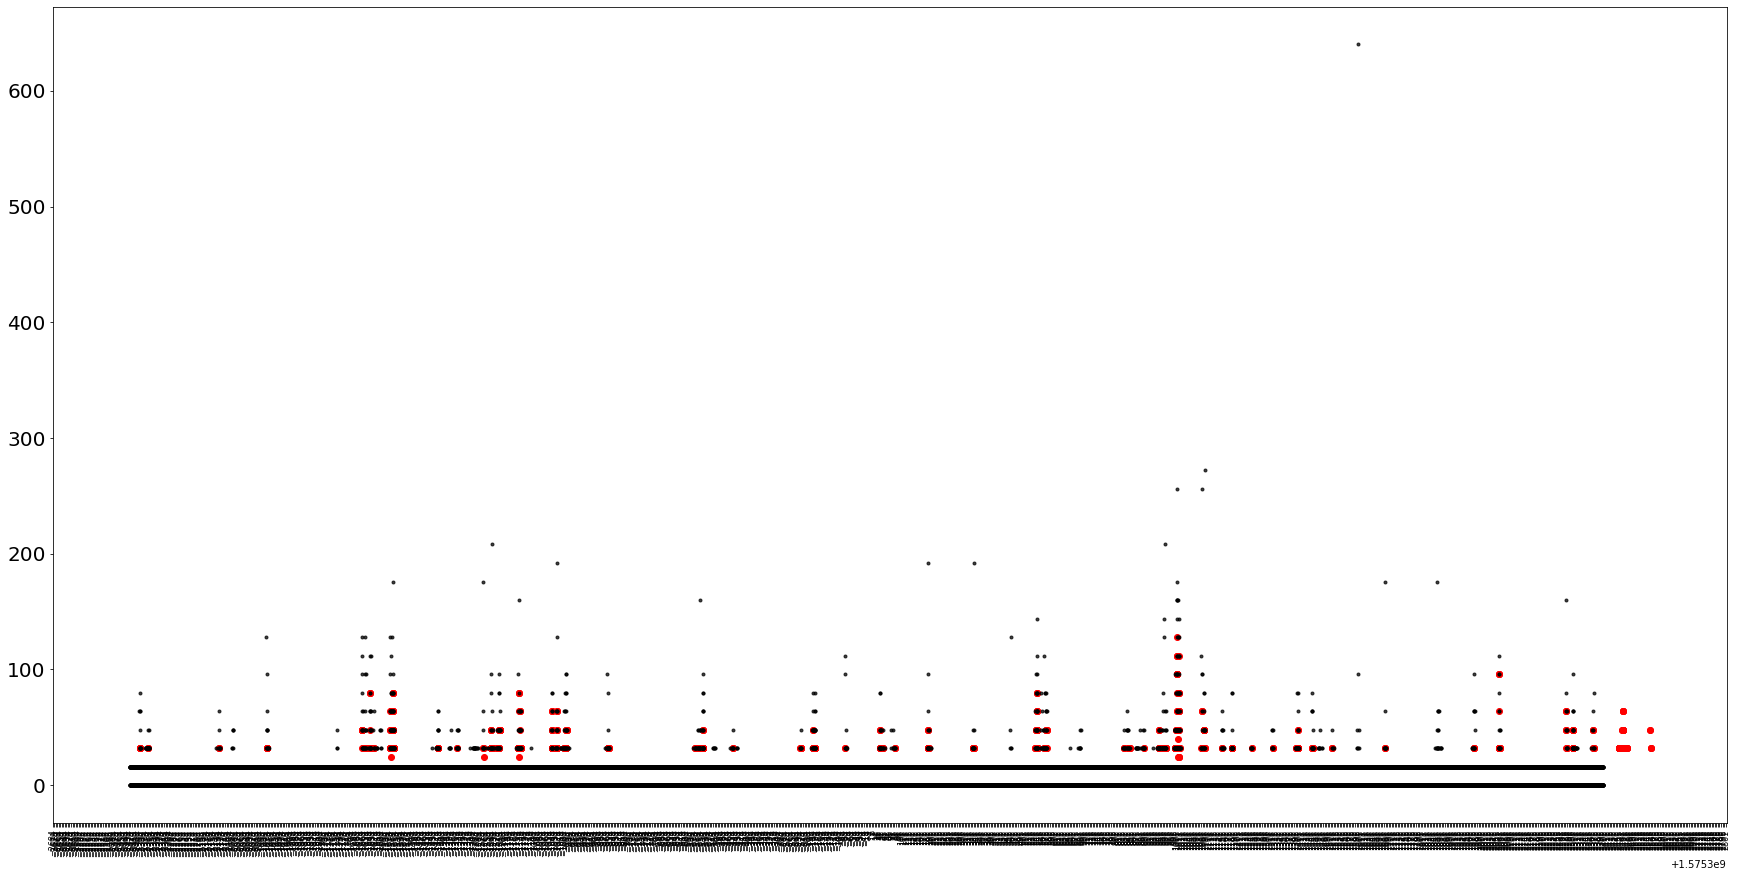

In [6]:
fig, ax = plt.subplots(figsize=(30, 15))

plt.scatter(events['ts'],events['value'],color='r', marker='o')
plt.scatter(x,y,color='k', marker='.', alpha=0.75)

plt.xticks(rotation='vertical')

#change xtick frequency
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
    
# We change the fontsize of minor ticks label 
ax.tick_params(axis="x", which='major', labelsize=8)
ax.tick_params(axis="y", which='major', labelsize=20)


plt.show()


#fig.savefig("test_pdf5.pdf", bbox_inches='tight')
